<div style="color:black;background-color:brown;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">TaxiFare amount Prediction-> Regression
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install geopy

In [4]:
df=pd.read_csv('TaxiFaredata.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.isnull().count()

unique_id               50000
amount                  50000
date_time_of_pickup     50000
longitude_of_pickup     50000
latitude_of_pickup      50000
longitude_of_dropoff    50000
latitude_of_dropoff     50000
no_of_passenger         50000
dtype: int64

In [7]:
df.nunique()

unique_id                3597
amount                    703
date_time_of_pickup     49555
longitude_of_pickup     33716
latitude_of_pickup      36594
longitude_of_dropoff    34878
latitude_of_dropoff     37423
no_of_passenger             7
dtype: int64

In [8]:
df=df.drop(['unique_id'],axis=1)

In [9]:
df.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


In [10]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [11]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup,errors='coerce')

In [12]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [13]:
pd.DataFrame(df.date_time_of_pickup)

,date_time_of_pickup
0,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00+00:00
...,...
49995,2013-06-12 23:25:15+00:00
49996,2015-06-22 17:19:18+00:00
49997,2011-01-30 04:53:00+00:00
49998,2012-11-06 07:09:00+00:00


In [14]:
df = df.assign(hour = df['date_time_of_pickup'].dt.hour,
             day = df['date_time_of_pickup'].dt.day,
             dayofweek = df['date_time_of_pickup'].dt.dayofweek,
             month = df['date_time_of_pickup'].dt.month,
             year = df['date_time_of_pickup'].dt.year)

In [15]:
df.drop(['date_time_of_pickup'],axis=1,inplace=True)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010


In [16]:
from math import radians, cos, sin, sqrt, asin

In [17]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_distance = []
    
    for i in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2*asin(sqrt(a))*6371    # 6371 is the radias of earth while measuring the distance of longitude and latitude 
        travel_distance.append(c)
        
    return travel_distance

In [18]:
df['travel_distance_klm']=distance_transform(df['longitude_of_pickup'].to_numpy(),
                                             df['latitude_of_pickup'].to_numpy(),
                                             df['longitude_of_dropoff'].to_numpy(),
                                             df['latitude_of_dropoff'].to_numpy())

In [19]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010,1.999157


In [20]:
df.dayofweek.value_counts().sort_values()

6    6518
0    6639
1    6927
2    7212
3    7406
5    7630
4    7668
Name: dayofweek, dtype: int64

In [21]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,15.672040,3.029980,6.273300,2011.739260,18.508946
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,8.660789,1.956936,3.461157,1.862639,355.564309
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,8.000000,1.000000,3.000000,2010.000000,1.223146
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,16.000000,3.000000,6.000000,2012.000000,2.120114
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,23.000000,5.000000,9.000000,2013.000000,3.895570
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,31.000000,6.000000,12.000000,2015.000000,8667.818812


In [22]:
df=df.loc[(df.amount >= 2.5)]

In [23]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,2,6,2013,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,0,6,2015,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,6,1,2011,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,1,11,2012,0.665245


In [24]:
df.shape

(49990, 12)

Text(0.5, 1.0, 'distribution plot')

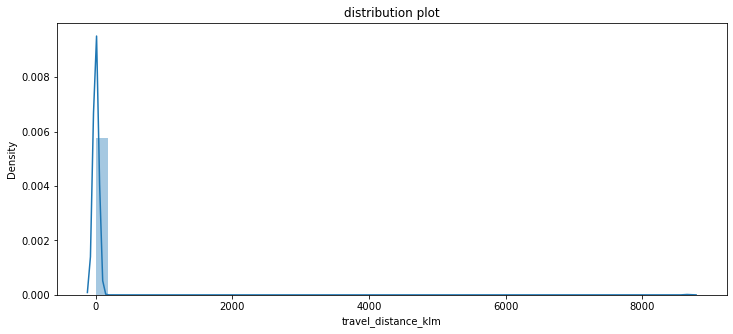

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(df['travel_distance_klm'])
plt.title('distribution plot')

In [27]:
df=df.loc[(df.travel_distance_klm>=1) | (df.travel_distance_klm<=130)]
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,2,6,2013,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,0,6,2015,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,6,1,2011,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,1,11,2012,0.665245


In [28]:
incorrect_cordinates = df.loc[(df['latitude_of_pickup'] > 90) | (df['latitude_of_pickup'] < -90) |
           (df['latitude_of_dropoff'] > 90) | (df['latitude_of_dropoff'] < -90)|
           (df['longitude_of_pickup'] >180) | (df['longitude_of_pickup'] <-180)|
           (df['longitude_of_dropoff'] >90) | (df['longitude_of_pickup'] <-90)].index


In [29]:
incorrect_cordinates

Int64Index([5686], dtype='int64')

In [30]:
df.drop(incorrect_cordinates, inplace=True)

In [31]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,0,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,3,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,1,3,2010,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,23,12,2,6,2013,4.940374
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,17,22,0,6,2015,0.874706
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,4,30,6,1,2011,2.263286
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,7,6,1,11,2012,0.665245


<AxesSubplot:title={'center':'Peek Hours during week days'}, xlabel='hour', ylabel='count'>

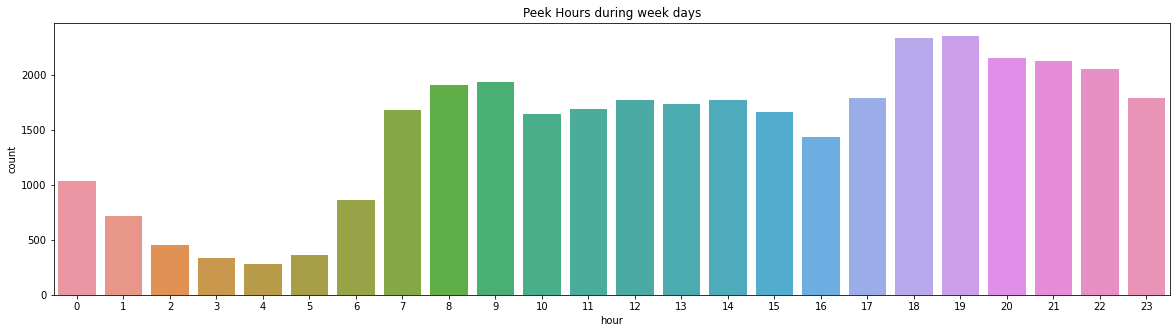

In [32]:
plt.figure(figsize=(20,5))
plt.title ('Peek Hours during week days')
sns.countplot(x='hour',data=df.loc[(df['dayofweek']>=0) & (df['dayofweek']<=4)])

<AxesSubplot:title={'center':'Peek Hours during week ends'}, xlabel='hour', ylabel='count'>

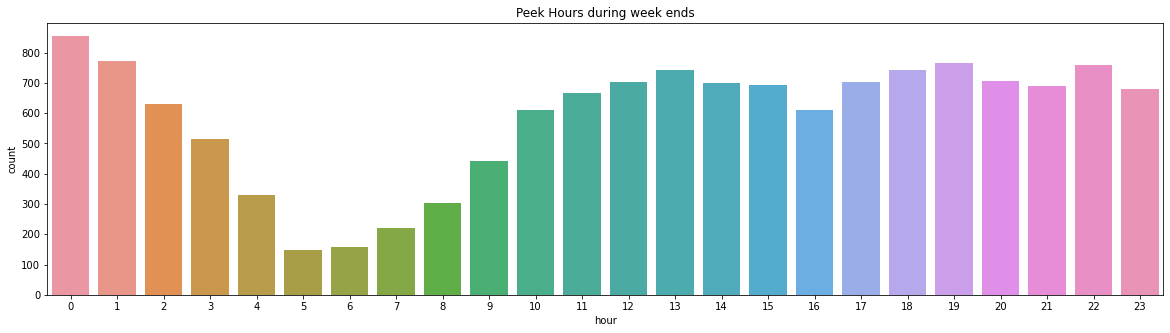

In [33]:
plt.figure(figsize=(20,5))
plt.title ('Peek Hours during week ends')
sns.countplot(x='hour',data=df.loc[(df['dayofweek']>=5) & (df['dayofweek']<=6)])

In [34]:
# Set the days in the dataset as week days and week ends
week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

In [35]:
week_days_fare.head()

,hour,amount
0,0,12.079275
1,1,12.522360
2,2,10.929956
3,3,11.837477
4,4,14.961357


In [37]:
wwc = pd.merge(week_days_fare, week_ends_fare, on='hour',suffixes=['_Weekday','_Weekends'])
wwc.head()

,hour,amount_Weekday,amount_Weekends
0,0,12.079275,11.733544
1,1,12.522360,10.991658
2,2,10.929956,11.476212
3,3,11.837477,12.249047
4,4,14.961357,12.704848


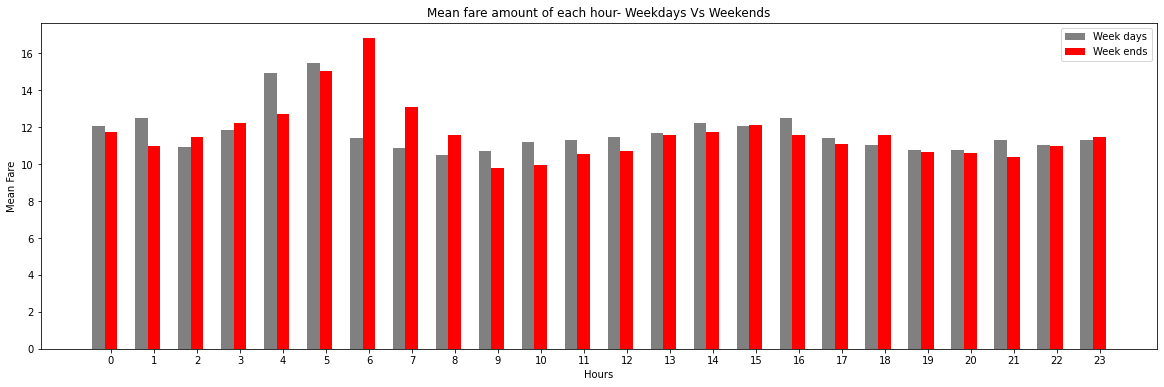

In [38]:
x=np.array(wwc.hour)
y=np.array(wwc.amount_Weekday)
z=np.array(wwc.amount_Weekends)

# Set the figure size, title, x and y labels
plt.figure(figsize=(20,6))
plt.title('Mean fare amount of each hour- Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')

#pass the x,y,z to make the barplot
ax=plt.subplot(1,1,1)
ax.bar(x-0.3 , y , width=0.3,color='gray', align='center', label = 'Week days')
ax.bar(x , z , width=0.3,color='red', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

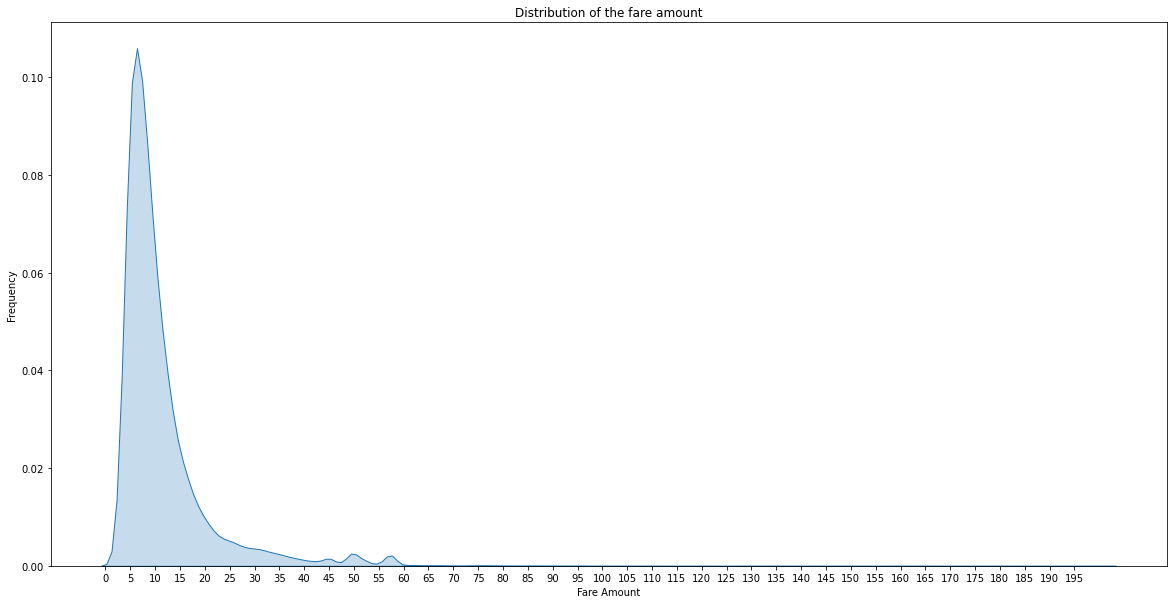

In [39]:
plt.figure(figsize=(20,10))
sns.set_style=("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df.amount, shade=True)

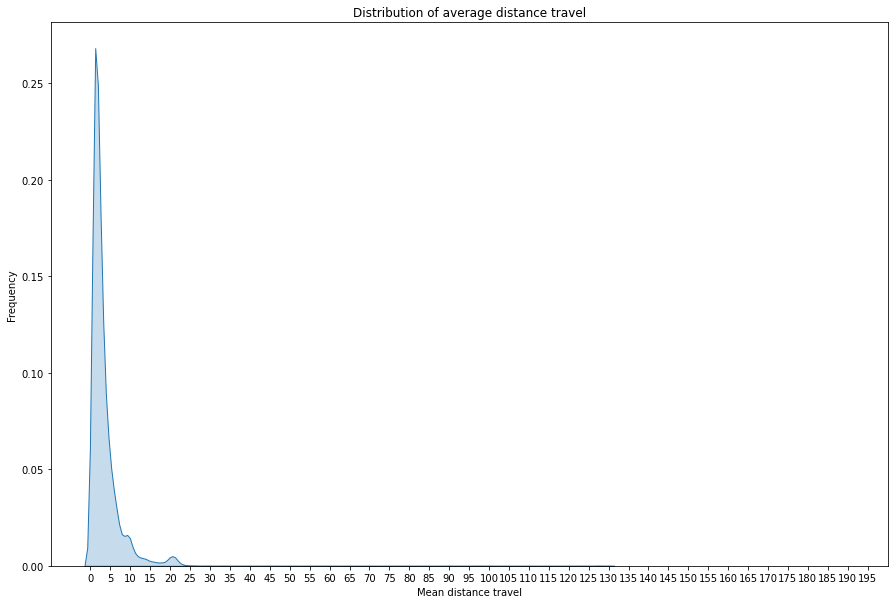

In [40]:
plt.figure(figsize=(15,10))
sns.set_style=('darkgrid')
plt.title('Distribution of average distance travel')
plt.xlabel('Mean distance travel')
plt.ylabel('Frequency')
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(df[df.travel_distance_klm<130].travel_distance_klm, shade=True)

In [45]:
x=df.drop(['amount'],axis=1)
y=pd.DataFrame(df['amount'])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [49]:
print('shape of x_train',x_train.shape,'\n'
     'shape of x_test',x_test.shape,'\n'
     'shape of y_train',y_train.shape,'\n'
     'shape of y_test',y_test.shape,'\n')


shape of x_train (39991, 11) 
shape of x_test (9998, 11) 
shape of y_train (39991, 1) 
shape of y_test (9998, 1) 



In [50]:
x_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,dayofweek,month,year,travel_distance_klm
33093,-73.978245,40.793087,-73.982318,40.771358,1,13,24,5,10,2009,2.440370
20871,0.000000,0.000000,0.000000,0.000000,1,22,9,3,8,2012,0.000000
34740,-73.968235,40.802372,-73.975480,40.792147,1,18,10,3,5,2012,1.290207
6738,-73.986903,40.738657,-73.995965,40.742550,2,13,20,6,1,2013,0.877649
15223,-73.964257,40.776312,-73.985415,40.747232,2,15,17,1,6,2014,3.692057
...,...,...,...,...,...,...,...,...,...,...,...
25550,-73.962503,40.758132,-73.970823,40.764116,1,13,24,1,2,2009,0.966322
48067,-73.952005,40.769385,-74.004572,40.752102,1,23,19,4,3,2010,4.826493
11518,-73.987287,40.720205,-73.983615,40.738030,1,3,16,6,1,2011,2.006056
1688,-73.977162,40.751877,-73.997290,40.756222,1,22,29,5,11,2014,1.762923


In [51]:
y_train

,amount
33093,6.9
20871,18.9
34740,5.3
6738,5.5
15223,15.0
...,...
25550,5.3
48067,13.3
11518,6.5
1688,8.0


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
RFR=RandomForestRegressor(n_estimators=100,random_state=10)

In [54]:
RFR.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [55]:
y_pred=RFR.predict(x_test)

In [56]:
from sklearn import metrics

In [57]:
# MAE
Mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
print('mean absolute error',Mean_absolute_error)

#MSE
Mean_Squared_Error=metrics.mean_squared_error(y_test,y_pred)
print('mean square error',Mean_Squared_Error)

#RMSE
Root_Mean_Squared_Error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('root mean square error',Root_Mean_Squared_Error)

mean absolute error 2.0383241214909646
mean square error 19.592297640950303
root mean square error 4.426318745972809


In [58]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , StratifiedKFold, cross_val_score
from scipy.stats import randint

In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [60]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [61]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = RFR, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [62]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=10),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [63]:
rf_RandomGrid.best_params_

{'n_estimators': 33,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [64]:
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.748
Test Accuracy - : 0.747
